# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [2]:
minValue = 1
maxValue = 6
numberOfSamples = 1000000 # Increase number to show that it converges to a uniform distribution

In [3]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [4]:
results

0         2
1         1
2         5
3         4
4         3
         ..
999995    5
999996    5
999997    6
999998    6
999999    4
Length: 1000000, dtype: int32

<AxesSubplot:ylabel='None'>

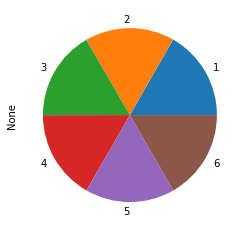

In [5]:
results.value_counts().sort_index().plot(kind='pie')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [6]:
averageLength = 182.95
stdLength = 8
numberOfPeopleToSample = 1744000 # Play with these values to show the impact on the histogram

In [7]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [8]:
randomLengths

0          174.679816
1          191.257554
2          193.128589
3          189.058669
4          195.391064
              ...    
1743995    183.015838
1743996    181.724059
1743997    191.748828
1743998    185.935802
1743999    181.707666
Length: 1744000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

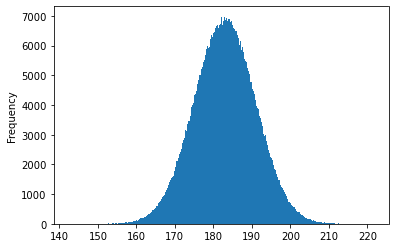

In [9]:
randomLengths.plot(kind='hist', bins=1000)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [10]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [11]:
sampleMeans

[182.5464998470366,
 182.67203075650326,
 183.99290456711395,
 183.48305756011308,
 182.30311527386115,
 183.2701288443245,
 183.11433203926327,
 183.75003406252696,
 182.57366784625788,
 182.9831788576491,
 183.86830230910485,
 181.22732664798517,
 181.89331115912148,
 182.97929833260446,
 181.9586553576243,
 182.61704308858475,
 182.92634086443806,
 182.34166646321825,
 183.70376848308425,
 182.4523983370296,
 181.04109475796332,
 183.07901239487498,
 181.26652560775918,
 184.3898975505867,
 181.48923438481444,
 183.32429632145954,
 182.64470517288544,
 182.79990964779338,
 182.7259210552303,
 183.84557666922993,
 183.653050908404,
 183.37593774559807,
 183.43210208148966,
 183.068123010856,
 182.3582861328194,
 183.21254274631679,
 181.01130489170285,
 184.45277638920174,
 182.23801415640406,
 183.15771988607975,
 182.3000959362444,
 183.07517945680908,
 183.03092297471724,
 182.53732129066924,
 181.848199985806,
 182.43462043861018,
 183.23539374077882,
 182.2625053825951,
 183.458

<AxesSubplot:ylabel='Frequency'>

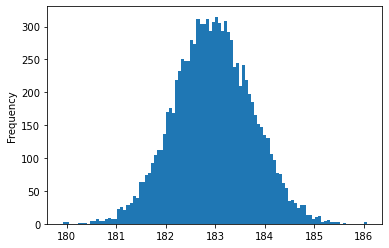

In [12]:
pd.Series(sampleMeans).plot(kind='hist', bins = 100)

In [13]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

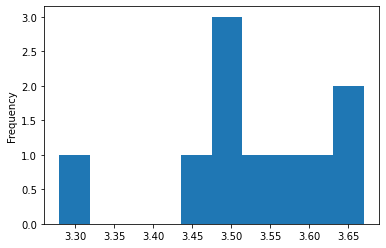

In [14]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [15]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(181.18860921236967, 184.04772722659453)

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.186584814538377, 3.813415185461623)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [17]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507367, 5.976934185159302)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)